# `classification.XGBoostCVClassifier`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.0


In [21]:
from slickml.classification import XGBoostCVClassifier

help(XGBoostCVClassifier)

Help on class XGBoostCVClassifier in module slickml.classification._xgboostcv:

class XGBoostCVClassifier(slickml.classification._xgboost.XGBoostClassifier)
 |  XGBoostCVClassifier(num_boost_round: Optional[int] = 200, sparse_matrix: Optional[bool] = False, scale_mean: Optional[bool] = False, scale_std: Optional[bool] = False, importance_type: Optional[str] = 'total_gain', params: Optional[Dict[str, Union[str, float, int]]] = None, n_splits: Optional[int] = 4, metrics: Optional[str] = 'auc', early_stopping_rounds: Optional[int] = 20, random_state: Optional[int] = 1367, stratified: Optional[bool] = True, shuffle: Optional[bool] = True, verbose: Optional[bool] = True, callbacks: Optional[bool] = False) -> None
 |  
 |  XGBoost CV Classifier.
 |  
 |  This is wrapper using ``XGBoostClassifier`` to train a XGBoost [xgboost-api]_ model with using the optimum
 |  number of boosting rounds from the inputs. It used ``xgboost.cv()`` model with n-folds
 |  cross-validation and train model based 

### Example 1: `XGBoostCVClassifer` model for `breast-cancer` data set

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    stratify=y,
)

In [5]:
# custom params
params = {
    "eval_metric": "auc",
    "learning_rate": 0.05,
    "max_depth": 2,
    "min_child_weight": 1,
    "gamma": 0.0,
}
clf = XGBoostCVClassifier(
    num_boost_round=333,
    metrics=("logloss"),
    params=params,
)
clf.fit(X_train, y_train)

*-* Best Boosting Round = 288 -*- 4-Folds CV LOGLOSS: Train = 0.013 +/- 0.001 -*- Test = 0.091 +/- 0.043 *-*


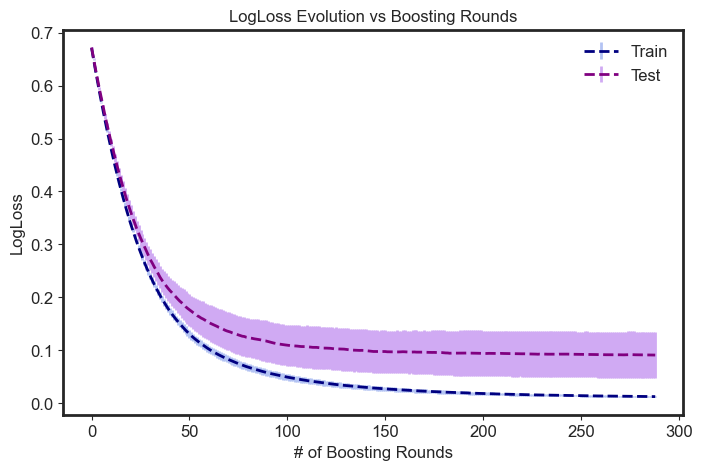

In [6]:
clf.plot_cv_results()

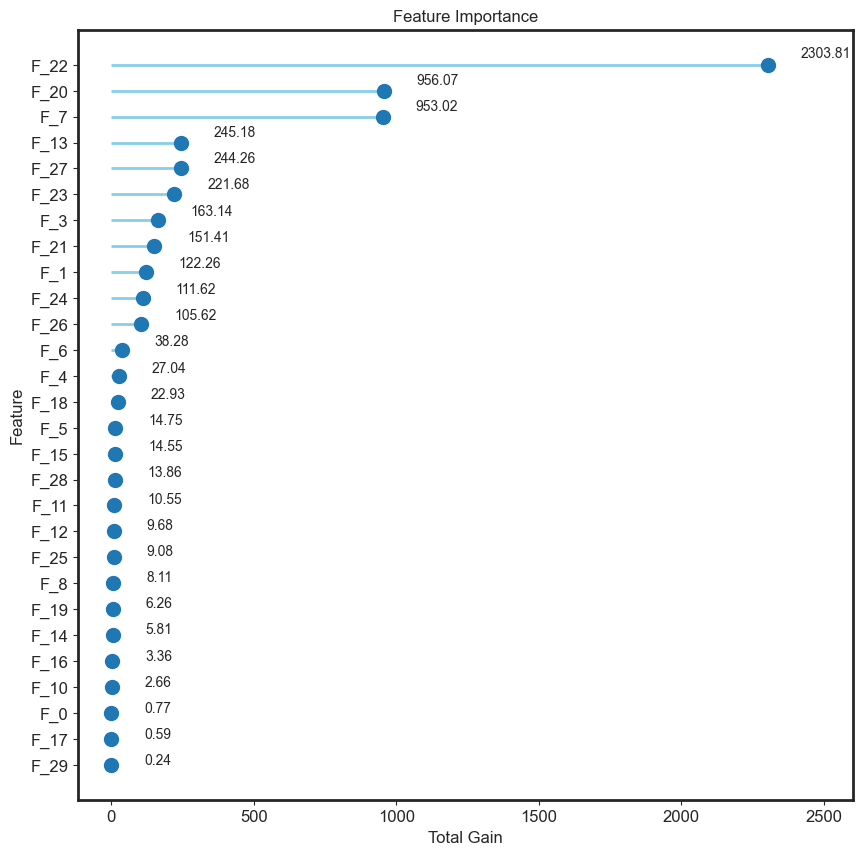

In [7]:
clf.plot_feature_importance(figsize=(10, 10))

In [8]:
# predic proba (or clf.y_pred_proba_)
# please note that y_test is optional
y_pred_proba = clf.predict_proba(X_test, y_test=None)
y_pred_proba[:10]

array([9.7599369e-01, 9.9930751e-01, 9.9883586e-01, 9.7662932e-01,
       9.9870420e-01, 9.9470043e-01, 9.9591631e-01, 9.9883336e-01,
       9.4200775e-04, 2.2594287e-04], dtype=float32)

In [9]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [10]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

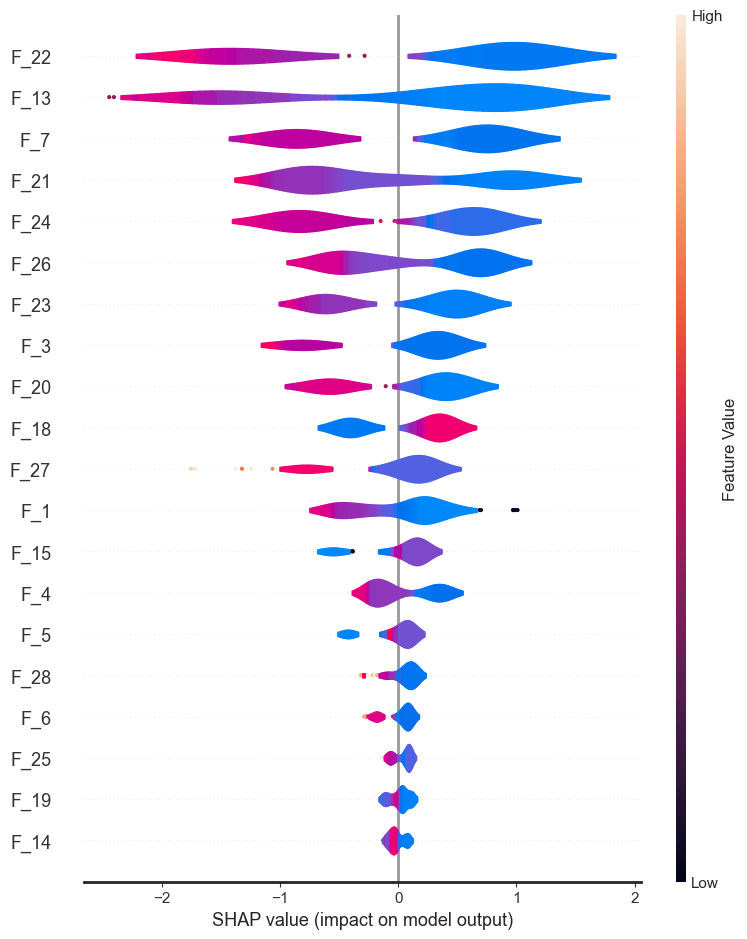

In [11]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

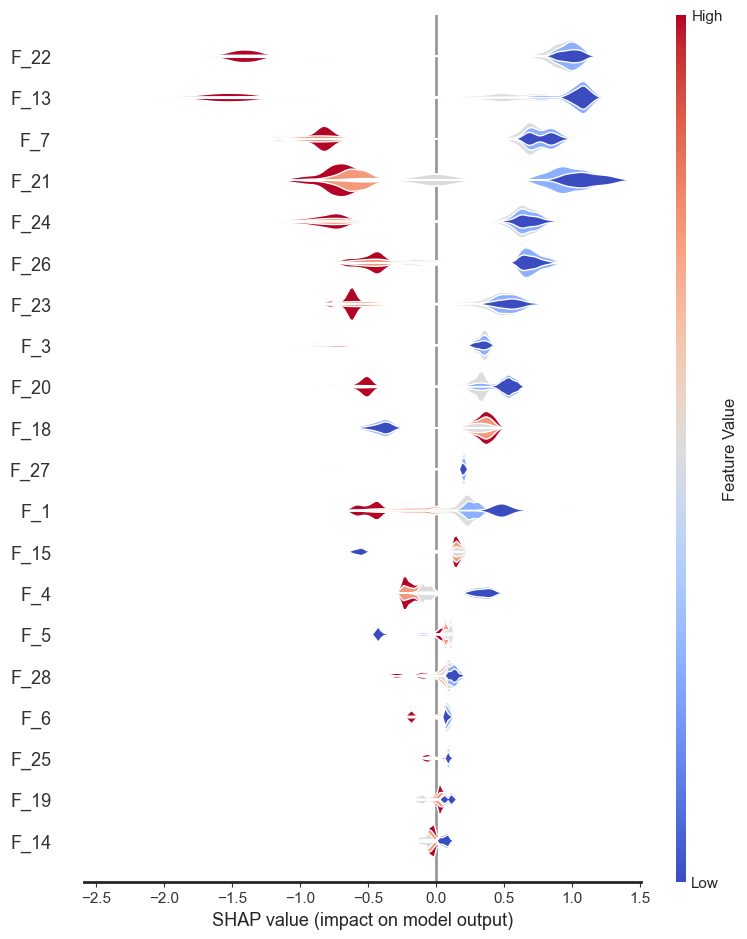

In [12]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(
    plot_type="layered_violin",
    validation=False,
    layered_violin_max_num_bins=5,
)

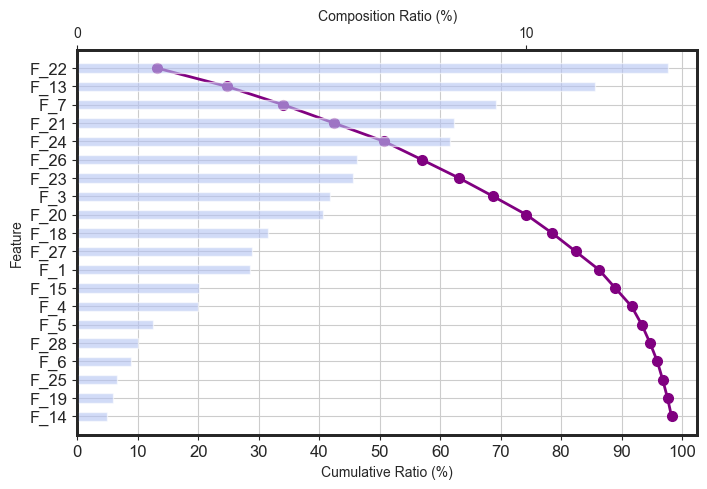

In [13]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [14]:
clf.shap_values_test_[:10]

array([[ 2.02379636e-02, -6.11066937e-01,  0.00000000e+00,
         3.84651721e-01,  3.78844172e-01, -4.29067791e-01,
         6.77065328e-02,  7.83845603e-01,  1.90578168e-03,
         0.00000000e+00,  1.20262671e-02, -5.89316078e-02,
         2.40976289e-02,  1.01693821e+00, -1.05175614e-01,
        -6.04165673e-01, -3.23700644e-02,  3.04031512e-03,
        -4.70300347e-01,  1.13306068e-01,  3.33663791e-01,
        -9.21858251e-01,  9.59744573e-01,  3.13208252e-01,
         6.12746894e-01,  7.76367560e-02,  7.43782520e-01,
         1.87992275e-01,  1.33543730e-01, -1.08422684e-02],
       [-2.80868094e-02,  4.22973812e-01,  0.00000000e+00,
         3.41923594e-01,  2.49550745e-01, -4.29067791e-01,
         7.84806833e-02,  6.75377548e-01,  3.01137641e-02,
         0.00000000e+00,  1.65024102e-02,  2.47981399e-03,
         2.40976289e-02,  1.09187424e+00,  3.58676538e-02,
        -5.45354187e-01, -3.23700644e-02, -9.02408035e-04,
         1.82287797e-01,  8.57561752e-02,  5.16514361e-

In [15]:
clf.shap_values_train_[:10]

array([[ 2.02379636e-02,  2.96295464e-01,  0.00000000e+00,
         3.62586558e-01,  3.41812372e-01, -3.70113283e-01,
         1.06027879e-01,  8.12613487e-01, -6.18481170e-03,
         0.00000000e+00,  7.13849161e-03,  4.78022844e-02,
         1.48275532e-02,  5.02049506e-01,  7.48957396e-02,
        -4.27582294e-01, -3.23700644e-02, -9.02408035e-04,
        -3.58567476e-01,  1.16059057e-01,  2.94315815e-01,
         5.82425058e-01,  5.47335267e-01, -3.77994299e-01,
         7.94094563e-01,  8.99415910e-02,  6.61017060e-01,
         2.08643600e-01,  9.56424549e-02, -1.08422684e-02],
       [ 2.02379636e-02,  3.27551275e-01,  0.00000000e+00,
         3.62586558e-01,  2.68023163e-01,  1.11447051e-01,
         1.01993896e-01,  6.85264111e-01,  1.90578168e-03,
         0.00000000e+00,  1.65024102e-02,  2.47981399e-03,
         2.40976289e-02,  1.06702733e+00,  2.81728394e-02,
         1.64263159e-01, -3.23700644e-02, -9.02408035e-04,
         2.55081385e-01,  6.31210655e-02,  3.59908193e-

In [16]:
# cv_results (or clf.cv_results_)
cvr = clf.get_cv_results()
cvr.tail()

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
284,0.012917,0.001072,0.091380,0.043804
285,0.012890,0.001068,0.091287,0.043654
286,0.012849,0.001056,0.091332,0.043676
287,0.012807,0.001043,0.091183,0.043590
288,0.012779,0.001045,0.091180,0.043440


In [17]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F_22,2303.809814
1,F_20,956.066650
2,F_7,953.023254
3,F_13,245.175446
4,F_27,244.261536
5,F_23,221.684570
6,F_3,163.136856
7,F_21,151.410385
8,F_1,122.261154
9,F_24,111.616310


In [18]:
clf.model_

## You can use the `BinaryClassificationMetrics` class to evaluate your model

In [19]:
from slickml.metrics import BinaryClassificationMetrics

metrics = BinaryClassificationMetrics(y_test, y_pred_proba)

,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.500 | Average = Binary,0.959000,0.958000,0.990000,0.993000,0.972000,0.963000,0.993000,0.967000,0.964000,0.970000,0.936000,103,61,3,4


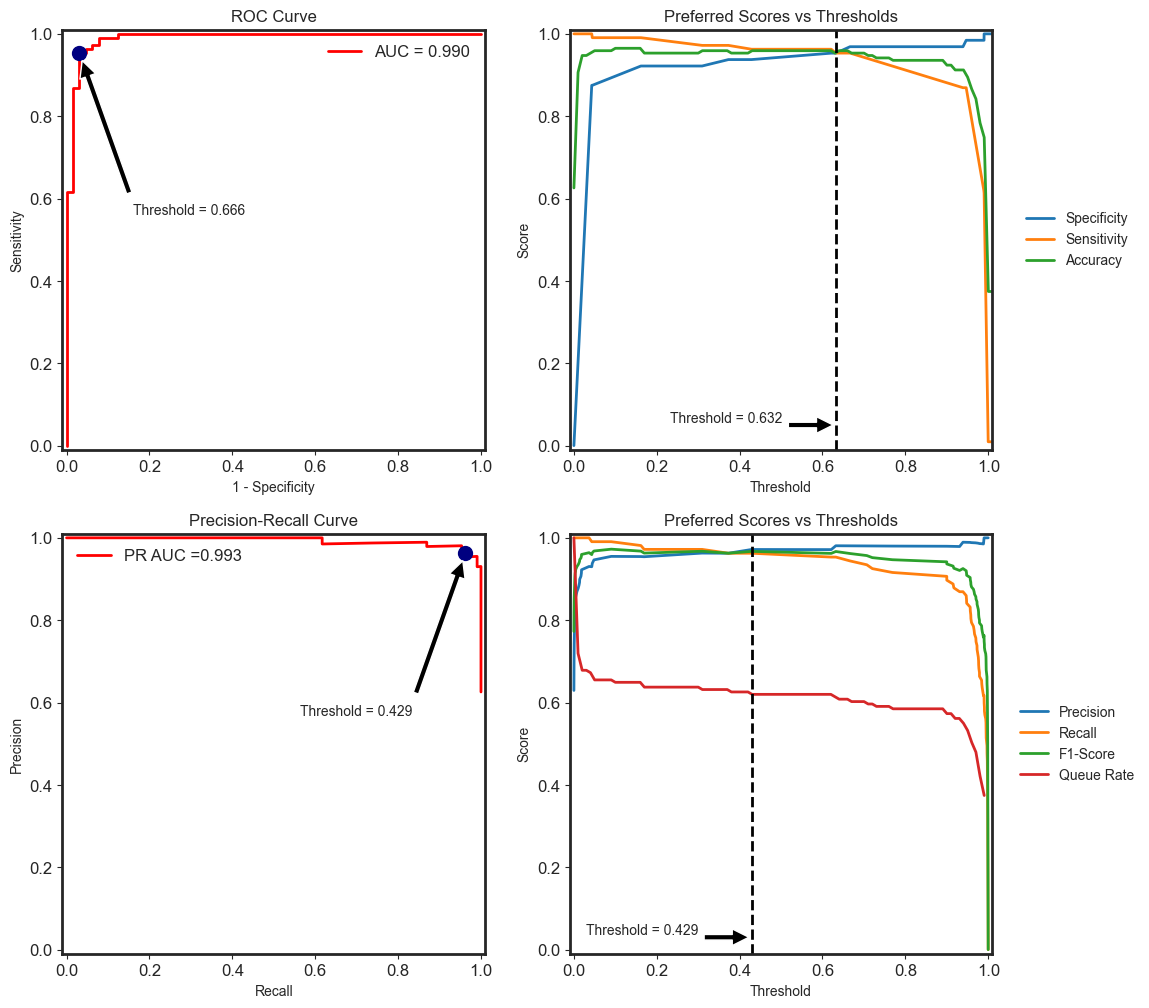

In [20]:
metrics.plot()

### Feel free to add your favorite `Example` via a `pull-request`.
### More details can be found in our [Contributing Document](https://github.com/slickml/slick-ml/blob/master/CONTRIBUTING.md).